In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [6]:
import requests
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | oistins
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | tahoua
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | glenwood springs
Processing Record 11 of Set 1 | tecoanapa
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | manacapuru
Processing Record 15 of Set 1 | svetlaya
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | marrakesh
Processing Record 18 of Set 1 | whangarei
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | punta arenas
Processing Record 

Processing Record 36 of Set 4 | half moon bay
Processing Record 37 of Set 4 | port blair
Processing Record 38 of Set 4 | ciudad bolivar
Processing Record 39 of Set 4 | mareeba
Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | pacific grove
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | prince rupert
Processing Record 44 of Set 4 | ilabaya
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 4 | bathsheba
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | samusu
City not found. Skipping...
Processing Record 50 of Set 4 | sokoto
Processing Record 1 of Set 5 | awbari
Processing Record 2 of Set 5 | margate
Processing Record 3 of Set 5 | pangkalanbuun
Processing Record 4 of Set 5 | rocha
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | ranong
Processing Record 7 of Set 5 | havoysu

Processing Record 27 of Set 8 | olafsvik
Processing Record 28 of Set 8 | paamiut
Processing Record 29 of Set 8 | karratha
Processing Record 30 of Set 8 | carauari
Processing Record 31 of Set 8 | turukhansk
Processing Record 32 of Set 8 | clyde river
Processing Record 33 of Set 8 | ascension
Processing Record 34 of Set 8 | praya
Processing Record 35 of Set 8 | nakamura
Processing Record 36 of Set 8 | jever
Processing Record 37 of Set 8 | saint-pierre
Processing Record 38 of Set 8 | cozumel
Processing Record 39 of Set 8 | eugene
Processing Record 40 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 41 of Set 8 | agua dulce
Processing Record 42 of Set 8 | steenwijk
Processing Record 43 of Set 8 | yahotyn
Processing Record 44 of Set 8 | belmonte
Processing Record 45 of Set 8 | jalu
Processing Record 46 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 8 | goderich
Processing Record 48 of Set 8 | lorengau
Processing Record 49 of Set 8 | sur
Proc

Processing Record 19 of Set 12 | tevriz
Processing Record 20 of Set 12 | reconquista
Processing Record 21 of Set 12 | independenta
Processing Record 22 of Set 12 | puerto escondido
Processing Record 23 of Set 12 | viloco
Processing Record 24 of Set 12 | lima
Processing Record 25 of Set 12 | shunyi
Processing Record 26 of Set 12 | talara
Processing Record 27 of Set 12 | barra dos coqueiros
Processing Record 28 of Set 12 | ketchikan
Processing Record 29 of Set 12 | listvyagi
Processing Record 30 of Set 12 | kaduqli
Processing Record 31 of Set 12 | bouca
Processing Record 32 of Set 12 | toliary
City not found. Skipping...
Processing Record 33 of Set 12 | muros
Processing Record 34 of Set 12 | orgun
City not found. Skipping...
Processing Record 35 of Set 12 | palma di montechiaro
Processing Record 36 of Set 12 | minsk
Processing Record 37 of Set 12 | san andres
Processing Record 38 of Set 12 | mildura
Processing Record 39 of Set 12 | carutapera
Processing Record 40 of Set 12 | pustoshka
Pr

In [10]:
len(city_data)

582

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,91.33,67,20,11.50,MY,2022-01-30 07:21:04
1,Hobart,-42.8794,147.3294,77.22,56,20,1.01,AU,2022-01-30 07:18:39
2,Oistins,13.0667,-59.5333,75.29,73,40,14.97,BB,2022-01-30 07:23:20
3,Saldanha,-33.0117,17.9442,73.45,67,0,11.03,ZA,2022-01-30 07:23:20
4,Tahoua,14.8888,5.2692,62.58,13,0,16.11,NE,2022-01-30 07:23:21


In [12]:
#reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed.
new_columns=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_df=city_data_df[new_columns] 
city_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2022-01-30 07:21:04,5.4112,100.3354,91.33,67,20,11.50
1,Hobart,AU,2022-01-30 07:18:39,-42.8794,147.3294,77.22,56,20,1.01
2,Oistins,BB,2022-01-30 07:23:20,13.0667,-59.5333,75.29,73,40,14.97
3,Saldanha,ZA,2022-01-30 07:23:20,-33.0117,17.9442,73.45,67,0,11.03
4,Tahoua,NE,2022-01-30 07:23:21,14.8888,5.2692,62.58,13,0,16.11


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_df["Lat"]
max_temps = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

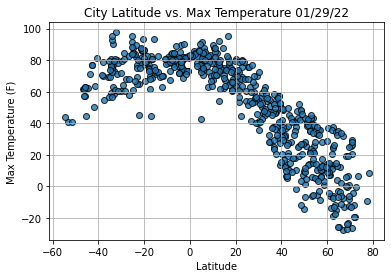

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

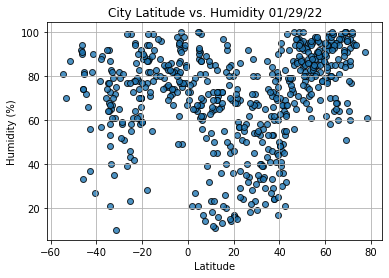

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
#plt.show()

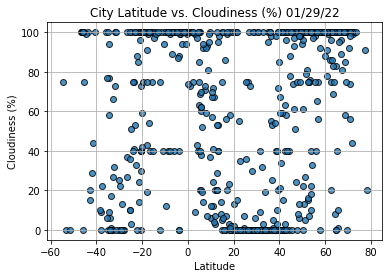

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
#plt.show()

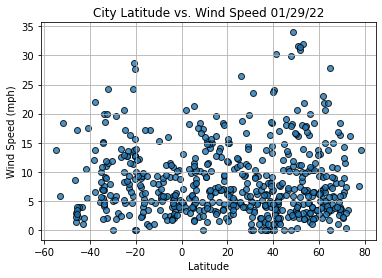

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
#plt.show()

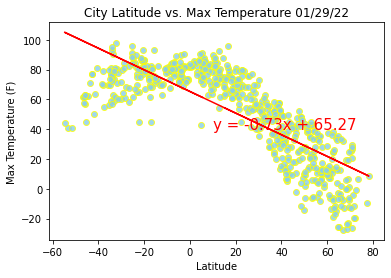

In [19]:
# Import linregress
from scipy.stats import linregress
import matplotlib.pyplot as plt

#perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept
    
#Create a scatter plot and plot the regression line.
plt.scatter(lats,max_temps,color='skyblue',edgecolor='yellow',alpha=0.8)
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title('City Latitude vs. Max Temperature '+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

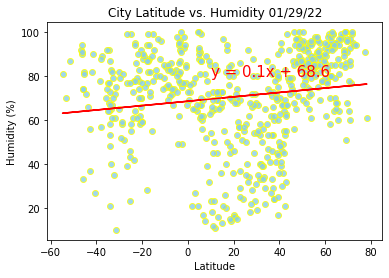

In [20]:
#plot humidity, cloudiness and wind_speed linreg.
#perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = lats * slope + intercept
    
#Create a scatter plot and plot the regression line.
plt.scatter(lats,humidity,color='skyblue',edgecolor='yellow',alpha=0.8)
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation.
plt.annotate(line_eq, (10,80), fontsize=15, color="red")
plt.title('City Latitude vs. Humidity '+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

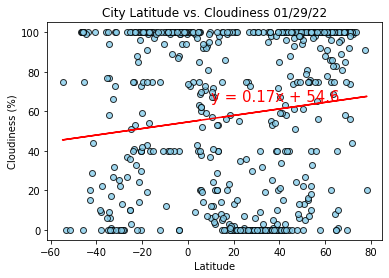

In [21]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = lats * slope + intercept
    
#Create a scatter plot and plot the regression line.
plt.scatter(lats,cloudiness,color='skyblue',edgecolor='k',alpha=0.8)
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation.
plt.annotate(line_eq, (10,65), fontsize=15, color="red")
plt.title('City Latitude vs. Cloudiness '+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

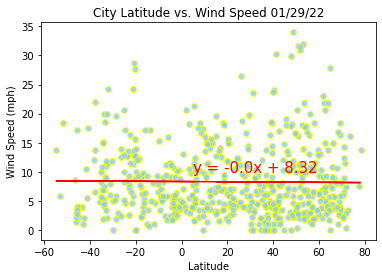

In [22]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = lats * slope + intercept
    
#Create a scatter plot and plot the regression line.
plt.scatter(lats,wind_speed,color='skyblue',edgecolor='yellow',alpha=0.8)
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation.
plt.annotate(line_eq, (5,10), fontsize=15, color="red")
plt.title('City Latitude vs. Wind Speed '+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
#get index13 from df.
index13=city_df.loc[13]
index13

City                         Lebu
Country                        CL
Date          2022-01-30 07:22:22
Lat                      -37.6167
Lng                        -73.65
Max Temp                    54.84
Humidity                       89
Cloudiness                     22
Wind Speed                   6.58
Name: 13, dtype: object

In [25]:
city_df.loc[(city_df['Lat'])>=0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2022-01-30 07:21:04,5.4112,100.3354,91.33,67,20,11.50
2,Oistins,BB,2022-01-30 07:23:20,13.0667,-59.5333,75.29,73,40,14.97
4,Tahoua,NE,2022-01-30 07:23:21,14.8888,5.2692,62.58,13,0,16.11
6,Barrow,US,2022-01-30 07:23:21,71.2906,-156.7887,-3.98,77,100,11.50
7,Albany,US,2022-01-30 07:23:22,42.6001,-73.9662,5.41,53,63,17.00


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_df.loc[(city_df["Lat"] >= 0)]
southern_hemi_df = city_df.loc[(city_df["Lat"] < 0)]

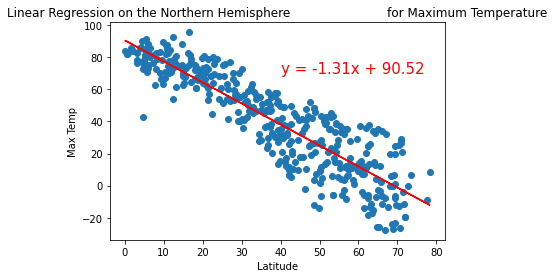

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(40,70))

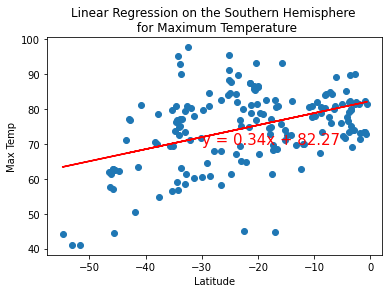

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,70))

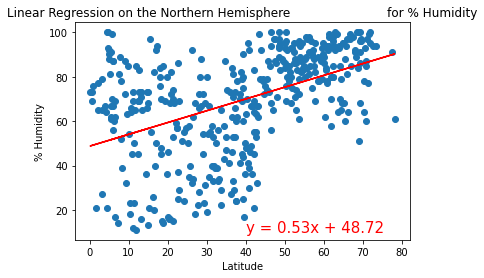

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

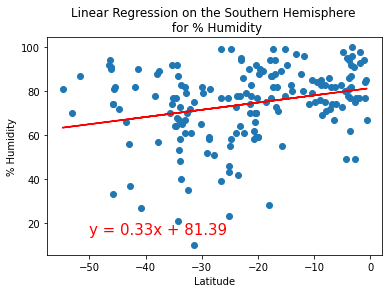

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

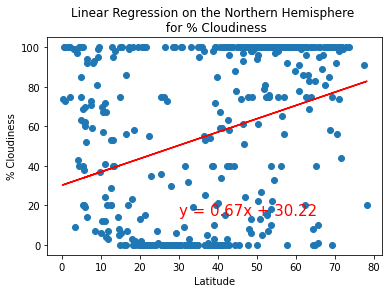

In [46]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(30,15))

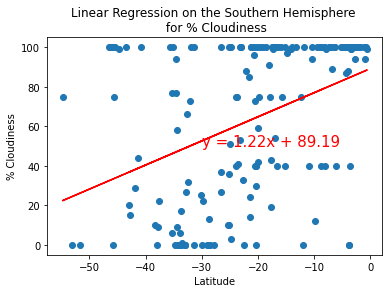

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-30,50))

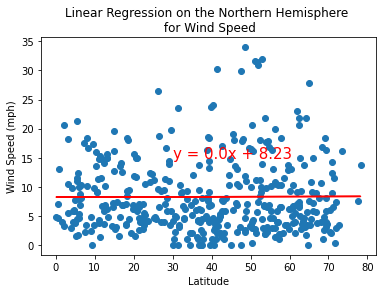

In [58]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)',(30,15))

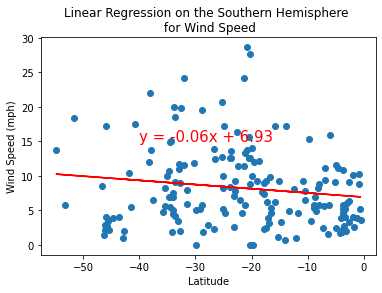

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)',(-40,15))